<a href="https://colab.research.google.com/github/Mittra19/Indian-Danceform-Detection/blob/master/DanceformDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


#Import Dataset

In [0]:
train_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hackerearth Competitions/Identify the dance form/dataset/train.csv')
test_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hackerearth Competitions/Identify the dance form/dataset/test.csv')

In [0]:
images = []
labels = []
filename = []
training_path = '/content/drive/My Drive/Colab Notebooks/Hackerearth Competitions/Identify the dance form/dataset/train'
for file in os.listdir(training_path):
  img = tf.keras.preprocessing.image.load_img(os.path.join(training_path, file), target_size=[600, 600], interpolation='nearest')
  img = tf.keras.preprocessing.image.img_to_array(img)
  for i in range(train_dataset.shape[0]):
    if str(file) == train_dataset['Image'][i]:
      filename.append(train_dataset['Image'][i])
      labels.append(train_dataset['target'][i])
  images.append(img)

#Data preprocessing and visualization

In [4]:
train_dataset.info

<bound method DataFrame.info of        Image         target
0     96.jpg       manipuri
1    163.jpg  bharatanatyam
2    450.jpg         odissi
3    219.jpg      kathakali
4    455.jpg         odissi
..       ...            ...
359   72.jpg       manipuri
360  253.jpg   mohiniyattam
361  404.jpg      kuchipudi
362   89.jpg       manipuri
363  311.jpg   mohiniyattam

[364 rows x 2 columns]>

In [5]:
train_dataset.describe

<bound method NDFrame.describe of        Image         target
0     96.jpg       manipuri
1    163.jpg  bharatanatyam
2    450.jpg         odissi
3    219.jpg      kathakali
4    455.jpg         odissi
..       ...            ...
359   72.jpg       manipuri
360  253.jpg   mohiniyattam
361  404.jpg      kuchipudi
362   89.jpg       manipuri
363  311.jpg   mohiniyattam

[364 rows x 2 columns]>

In [6]:
train_dataset.shape[0]

364

In [7]:
'''
training_path = '/content/drive/My Drive/Colab Notebooks/Hackerearth Competitions/Identify the dance form/dataset/train'
for file in os.listdir(training_path):
  img = tf.keras.preprocessing.image.load_img(os.path.join(training_path, file))
  img = tf.keras.preprocessing.image.img_to_array(img)
  print(img.shape)
  '''

"\ntraining_path = '/content/drive/My Drive/Colab Notebooks/Hackerearth Competitions/Identify the dance form/dataset/train'\nfor file in os.listdir(training_path):\n  img = tf.keras.preprocessing.image.load_img(os.path.join(training_path, file))\n  img = tf.keras.preprocessing.image.img_to_array(img)\n  print(img.shape)\n  "

In [9]:
images = np.array(images)
images.shape

(364, 600, 600, 3)

In [10]:
labels = np.array(labels)
labels

array(['kathakali', 'bharatanatyam', 'kathak', 'odissi', 'mohiniyattam',
       'kuchipudi', 'odissi', 'manipuri', 'bharatanatyam', 'sattriya',
       'kathak', 'kathakali', 'mohiniyattam', 'bharatanatyam',
       'kathakali', 'kuchipudi', 'sattriya', 'kathak', 'kuchipudi',
       'kathak', 'manipuri', 'kathakali', 'kathak', 'mohiniyattam',
       'kathak', 'odissi', 'sattriya', 'odissi', 'bharatanatyam',
       'manipuri', 'odissi', 'manipuri', 'manipuri', 'kuchipudi',
       'kuchipudi', 'bharatanatyam', 'bharatanatyam', 'kathak', 'kathak',
       'kathakali', 'kuchipudi', 'bharatanatyam', 'kuchipudi',
       'kuchipudi', 'bharatanatyam', 'mohiniyattam', 'sattriya',
       'sattriya', 'kathakali', 'kathakali', 'bharatanatyam', 'kuchipudi',
       'manipuri', 'bharatanatyam', 'manipuri', 'bharatanatyam',
       'sattriya', 'mohiniyattam', 'bharatanatyam', 'kathakali', 'kathak',
       'odissi', 'odissi', 'sattriya', 'mohiniyattam', 'manipuri',
       'kathak', 'manipuri', 'bharatanaty

In [11]:
type(images)

numpy.ndarray

In [14]:
"""
    This block of code counts the number of images belonging to each class. From the data it can be clearly seen that the distribution of data is nonuniform i.e. the number of examples belonging to each class is different 
"""
count_kathakali = 0
count_odissi = 0
count_kathak = 0
count_bharatanatyam = 0
count_kuchipudi = 0
count_manipuri = 0
count_sattriya = 0
count_mohiniyattam = 0
for i in range(len(labels)):
  if labels[i] == 'kathakali':
    count_kathakali +=1
  if labels[i] == 'kathak':
    count_kathak +=1
  if labels[i] == 'odissi':
    count_odissi +=1
  if labels[i] == 'bharatanatyam':
    count_bharatanatyam +=1
  if labels[i] == 'kuchipudi':
    count_kuchipudi +=1
  if labels[i] == 'manipuri':
    count_manipuri +=1
  if labels[i] == 'sattriya':
    count_sattriya +=1
  if labels[i] == 'mohiniyattam':
    count_mohiniyattam +=1

print("count_kathakali: "+str(count_kathakali))
print("count_odissi: "+str(count_odissi))
print("count_kathak: "+str(count_kathak))
print("count_bharatanatyam: "+str(count_bharatanatyam))
print("count_kuchipudi: "+str(count_kuchipudi))
print("count_manipuri: "+str(count_manipuri))
print("count_sattriya: "+str(count_sattriya))
print("count_mohiniyattam: "+str(count_mohiniyattam))

count_kathakali: 47
count_odissi: 49
count_kathak: 44
count_bharatanatyam: 47
count_kuchipudi: 46
count_manipuri: 36
count_sattriya: 45
count_mohiniyattam: 50


In [0]:
images = images/255.0

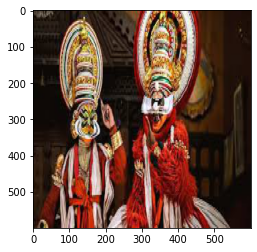

In [16]:
plt.imshow(images[0])

In [17]:
print(labels[0])
print(filename[0])

kathakali
230.jpg


In [18]:
le = LabelEncoder()
labels = le.fit_transform(labels)
labels

array([2, 0, 1, 6, 5, 3, 6, 4, 0, 7, 1, 2, 5, 0, 2, 3, 7, 1, 3, 1, 4, 2,
       1, 5, 1, 6, 7, 6, 0, 4, 6, 4, 4, 3, 3, 0, 0, 1, 1, 2, 3, 0, 3, 3,
       0, 5, 7, 7, 2, 2, 0, 3, 4, 0, 4, 0, 7, 5, 0, 2, 1, 6, 6, 7, 5, 4,
       1, 4, 0, 1, 2, 3, 2, 4, 3, 4, 2, 5, 6, 5, 5, 6, 2, 6, 2, 7, 5, 6,
       7, 1, 3, 6, 5, 4, 2, 7, 0, 7, 1, 2, 4, 5, 4, 1, 3, 7, 1, 3, 1, 1,
       3, 0, 7, 2, 1, 5, 5, 6, 0, 3, 5, 2, 4, 5, 2, 3, 3, 3, 4, 7, 2, 6,
       1, 0, 1, 1, 4, 5, 2, 0, 5, 6, 2, 5, 6, 0, 3, 2, 7, 3, 6, 0, 6, 6,
       7, 3, 6, 6, 4, 6, 0, 5, 5, 2, 4, 4, 7, 0, 4, 5, 7, 2, 6, 0, 1, 7,
       7, 6, 5, 0, 7, 0, 0, 4, 2, 3, 7, 3, 2, 3, 2, 5, 6, 6, 1, 0, 1, 6,
       5, 6, 6, 2, 2, 7, 5, 7, 2, 3, 1, 3, 1, 5, 4, 2, 0, 7, 7, 3, 3, 1,
       4, 5, 5, 3, 2, 6, 6, 0, 7, 7, 5, 3, 0, 2, 0, 5, 0, 7, 6, 2, 6, 3,
       5, 7, 7, 7, 5, 6, 5, 5, 1, 5, 6, 0, 4, 0, 7, 2, 1, 6, 7, 0, 6, 1,
       5, 6, 3, 5, 1, 0, 2, 1, 3, 6, 3, 3, 3, 1, 5, 6, 7, 5, 5, 2, 1, 0,
       1, 5, 1, 5, 3, 7, 2, 7, 7, 0, 2, 5, 5, 2, 4,

In [19]:
print(labels.shape)
labels = labels.reshape(len(labels), 1)
print(labels.shape)

(364,)
(364, 1)


In [20]:
one = OneHotEncoder()
labels = one.fit_transform(labels[:]).toarray()
labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [21]:
labels.shape

(364, 8)

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [23]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(291, 600, 600, 3)
(73, 600, 600, 3)
(291, 8)
(73, 8)


In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(600, 600, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    # 8 output neuron
    tf.keras.layers.Dense(8, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 598, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 299, 299, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 299, 299, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 297, 297, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      1

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train, Y_train, epochs=20, verbose = 2, validation_data=(X_val, Y_val), batch_size=64)

Epoch 1/20
5/5 - 3s - loss: 7.5263 - accuracy: 0.1649 - val_loss: 3.1992 - val_accuracy: 0.0685
Epoch 2/20
5/5 - 1s - loss: 3.2518 - accuracy: 0.5567 - val_loss: 3.3975 - val_accuracy: 0.1644
Epoch 3/20
5/5 - 1s - loss: 2.2326 - accuracy: 0.7491 - val_loss: 3.4958 - val_accuracy: 0.0959
Epoch 4/20
5/5 - 1s - loss: 2.0587 - accuracy: 0.8007 - val_loss: 4.0615 - val_accuracy: 0.1507
Epoch 5/20
5/5 - 1s - loss: 1.8509 - accuracy: 0.8454 - val_loss: 5.1250 - val_accuracy: 0.0685
Epoch 6/20
5/5 - 1s - loss: 1.6609 - accuracy: 0.8729 - val_loss: 5.7314 - val_accuracy: 0.0822
Epoch 7/20
5/5 - 1s - loss: 1.4851 - accuracy: 0.9244 - val_loss: 6.6587 - val_accuracy: 0.0822
Epoch 8/20
5/5 - 1s - loss: 1.4687 - accuracy: 0.9519 - val_loss: 7.8409 - val_accuracy: 0.0822
Epoch 9/20
5/5 - 1s - loss: 1.3960 - accuracy: 0.9553 - val_loss: 8.3272 - val_accuracy: 0.0822
Epoch 10/20
5/5 - 1s - loss: 1.3608 - accuracy: 0.9691 - val_loss: 8.1767 - val_accuracy: 0.0822
Epoch 11/20
5/5 - 1s - loss: 1.3109 - a

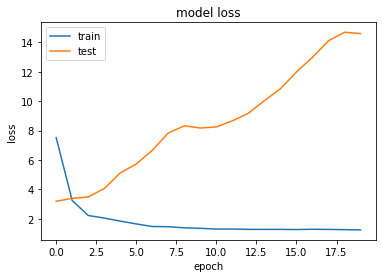

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

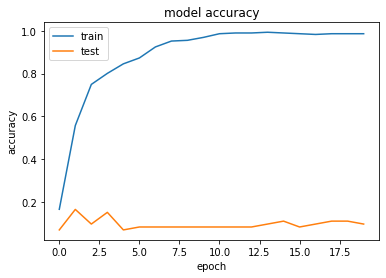

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()